In [139]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [161]:
class Experiment:
    def __init__(self, path):
        self.path = path
        self.main = pd.DataFrame()
        self.categories = []

    def read_data(self):
        """
        Reads the data from the csv file.
        """
        for root, dirs, files in os.walk(self.path):
            for dir in dirs:
                for root, dirs, files in os.walk(os.path.join(self.path, dir)):
                    for file in files:
                        if file.endswith('_data.csv'):
                            # save the file name without '_data'
                            file_name = file[:-7]
                            # print('Reading file:', file_name)

                            data = pd.read_csv(os.path.join(self.path, dir, file))
                            data.drop(['Unnamed: 0'], axis=1, inplace=True)
                            # add a column to indicate the file name
                            data['file_name'] = file_name

                            self.main = self.main.append(data)

    # def plot_data(self):
    #     """
    #     Plots the data.
    #     """
    #     # Save the unique categories
    #     for index, row in self.main.iterrows():
    #         # take the first 2 letters from the file name
    #         category = row['file_name'][:3]
    #         # Save unique categories
    #         if category not in self.categories:
    #             self.categories.append(category)
        
    #     accuracy = []
    #     for category in self.categories:
    #         print('Plotting category:', category)
            
    #         accuracy = self.main[self.main['file_name'].str.contains(category)]['accuracy']

    #         print('Accuracy:', accuracy)

    #         ax = accuracy.plot.bar()
    #         plt.tight_layout()

    #         # plot sns barplot of the accuracy
    #         sns.barplot(x=accuracy, y=accuracy.index)
    #         plt.title('Accuracy of {}'.format(category))
    #         plt.show()

    def new_plot(self):
        """
        Plots the data.
        """
        # make a copy
        data = self.main.copy()

        # remove max_len column
        data.drop(['max_len'], axis=1, inplace=True)

        # save file_name as the index
        data.set_index('file_name', inplace=True)

        # set a bigger size
        plt.rcParams['figure.figsize'] = (18, 8)
        ax = data.plot.bar(rot=45)
        plt.tight_layout()

In [164]:
path = "model"

demo = Experiment(path)
demo.read_data()
# print(demo.main)

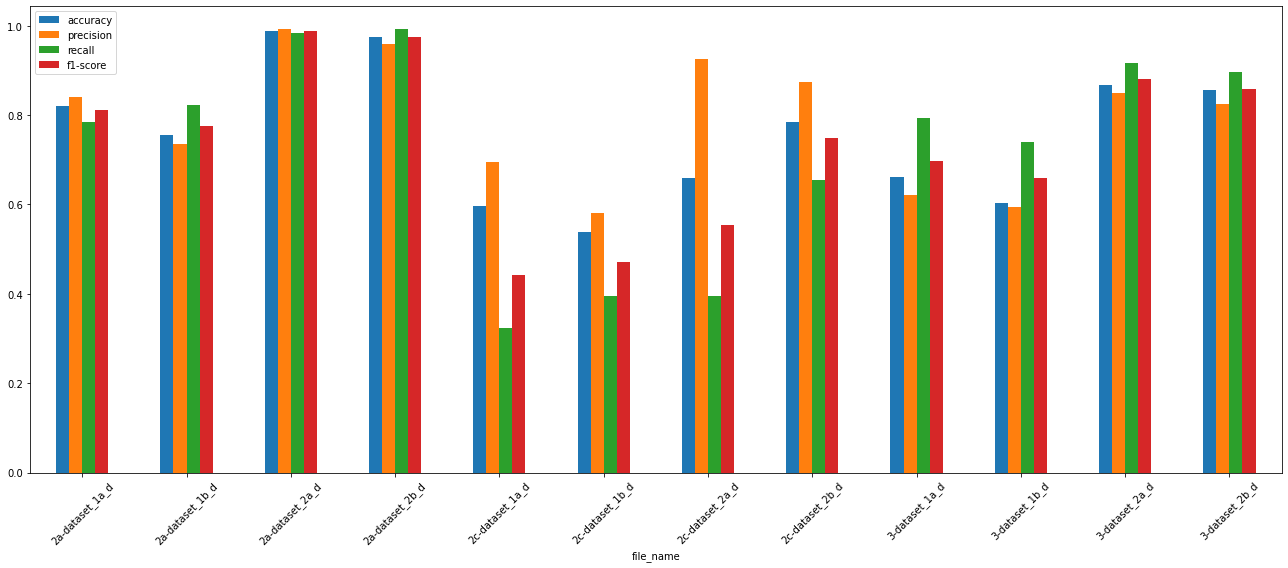

In [165]:
# demo.plot_data()

demo.new_plot()